<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import torchaudio
from scipy.stats import kurtosis, skew

# Carga el archivo de audio
audio_path = '/content/drive/MyDrive/Colab Notebooks/Jazz_2516_Tarea.wav'
waveform, sample_rate = torchaudio.load(audio_path)

# Convierte el waveform a un array de NumPy
audio_np = waveform.numpy()[0]

# Calcula la media
media = np.mean(audio_np)

# Calculo de kurtosis   Indicar que indica este valor
kurto = kurtosis(audio_np)

# Calculo de skewness
skewness = skew(audio_np)

# Calculo de zero crossing rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np, frame_length=2048, hop_length=512)

# Calcula el spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=sample_rate)

# Calcula la energía
energia = np.sum(audio_np ** 2)

# Calcula el RMSE (Root Mean Square Error)
rmse = librosa.feature.rms(y=audio_np)

# frecuencia fundamental
frec_fun = librosa.pyin(y=audio_np, fmin=85, fmax=180, sr = 44100)

print("Media:", media)
print("Kurtosis:", kurto)
print("Skewness:", skewness)
print("Zero Crossing Rate:", np.mean(zero_crossing_rate))
print("Spectral Centroid:", np.mean(spectral_centroid))
print("Energía:", energia)
print("RMSE:", np.mean(rmse))
print("Frecuencia Fundamental:", frec_fun)


Media: -1.2971189e-05
Kurtosis: 1.1766894836681923
Skewness: 0.26405963337841093
Zero Crossing Rate: 0.0238526178538497
Spectral Centroid: 803.9199989598983
Energía: 37293.844
RMSE: 0.17333172
Frecuencia Fundamental: (array([nan, nan, nan, ..., nan, nan, nan]), array([False, False, False, ..., False, False, False]), array([0.01      , 0.01019108, 0.01142233, ..., 0.01000618, 0.01000903,
       0.01025905]))




1. media = np.mean(audio_np): Calcula la media del array de audio utilizando la función mean de NumPy.

2. kurto = kurtosis(audio_np): Calcula la kurtosis del array de audio utilizando la función kurtosis importada de scipy.stats. La kurtosis es una medida de la forma de la distribución de probabilidad de una variable aleatoria.

3. skewness = skew(audio_np): Calcula la skewness del array de audio utilizando la función skew importada de scipy.stats. La skewness es una medida de la asimetría de la distribución de probabilidad de una variable aleatoria.

4. zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np, frame_length=2048, hop_length=512): Calcula la tasa de cruce por cero del array de audio utilizando la función zero_crossing_rate de librosa. La tasa de cruce por cero es una medida que indica la cantidad de veces que el señal cruza el eje horizontal en un intervalo de tiempo dado.

5. spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=sample_rate): Calcula el centroide espectral del array de audio utilizando la función spectral_centroid de librosa. El centroide espectral es una medida que indica el "centro de masa espectral" de una señal de audio, es decir, la frecuencia promedio ponderada por la amplitud de las frecuencias presentes en la señal.

6. energia = np.sum(audio_np ** 2): Calcula la energía del array de audio elevando al cuadrado cada elemento y luego sumando todos los elementos resultantes.

7. rms = librosa.feature.rms(y=audio_np): Calcula el Root Mean Square (RMS) del array de audio utilizando la función rms de librosa. El RMS es una medida de la amplitud promedio de la señal de audio.

8. frec_fun = librosa.pyin(y=audio_np, fmin=85, fmax=180, sr = 44100): Calcula la frecuencia fundamental del array de audio utilizando el algoritmo PYIN de librosa. La frecuencia fundamental es la frecuencia más baja y más prominente en una señal de audio, correspondiente al tono percibido.

## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


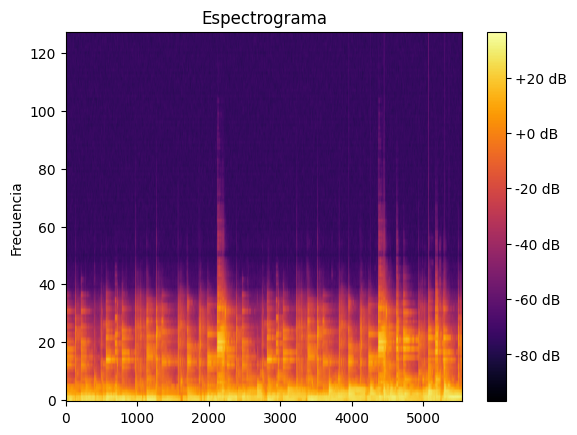

In [20]:
import torchaudio
import torch
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Colab Notebooks/Jazz_2516_Tarea.wav'

waveform, sr = torchaudio.load(file_path)
spectrogram = torchaudio.transforms.MelSpectrogram(32)(waveform)
log_spectrogram = torchaudio.transforms.AmplitudeToDB()(spectrogram)

#plt.figure(figsize=(10, 4))
plt.imshow(log_spectrogram[0].numpy(), cmap='inferno', origin='lower', aspect='auto')  # Utilizamos aspect='auto' para ajustar automáticamente el aspectoplt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Espectrograma (fft_size = 32)')
plt.colorbar(format='%+2.0f dB')
plt.show()


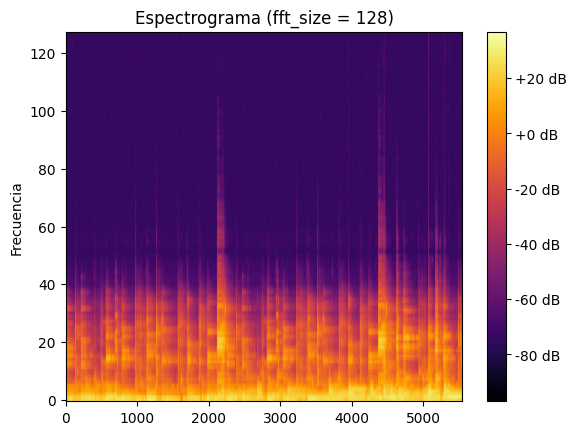

In [25]:
import torchaudio
import torch
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Colab Notebooks/Jazz_2516_Tarea.wav'

waveform, sr = torchaudio.load(file_path)
spectrogram = torchaudio.transforms.MelSpectrogram(128)(waveform)
log_spectrogram = torchaudio.transforms.AmplitudeToDB()(spectrogram)

#plt.figure(figsize=(10, 4))
plt.imshow(log_spectrogram[0].numpy(), cmap='inferno', origin='lower', aspect='auto')  # Utilizamos aspect='auto' para ajustar automáticamente el aspectoplt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Espectrograma (fft_size = 128)')
plt.colorbar(format='%+2.0f dB')
plt.show()


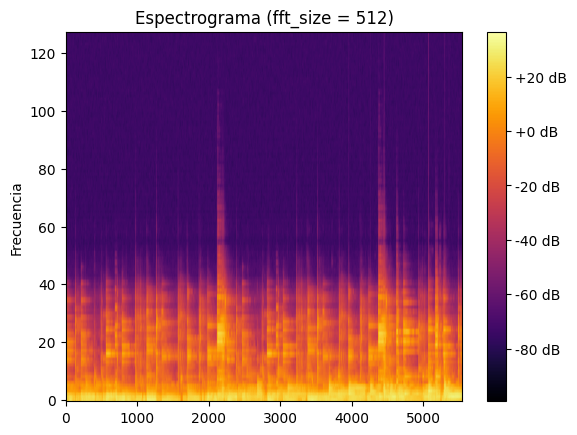

In [27]:
import torchaudio
import torch
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Colab Notebooks/Jazz_2516_Tarea.wav'

waveform, sr = torchaudio.load(file_path)
spectrogram = torchaudio.transforms.MelSpectrogram(512)(waveform)
log_spectrogram = torchaudio.transforms.AmplitudeToDB()(spectrogram)

#plt.figure(figsize=(10, 4))
plt.imshow(log_spectrogram[0].numpy(), cmap='inferno', origin='lower', aspect='auto')  # Utilizamos aspect='auto' para ajustar automáticamente el aspectoplt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Espectrograma (fft_size = 512)')
plt.colorbar(format='%+2.0f dB')
plt.show()



### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

Se adjunta archivo .m en repositorio asi como tambien el PDF.

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
